In [7]:
import time
import pandas as pd
import numpy as np
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt

In [ ]:
#define func to time each optimization run


In [9]:
#Start with peaks problem, highlighting the strengths of genetic algos
weights = [10, 5, 3, 20, 15, 16, 3, 1, 11, 12]
values = [2, 3, 3, 5, 10, 14, 4, 1, 2, 6]
max_weight = .5
knapsack_fitness_func = mlrose.Knapsack(weights, values, max_weight)
knapsack_problem = mlrose.DiscreteOpt(length=10, fitness_fn=knapsack_fitness_func, max_val=2)

In [19]:
#Randomized hill cimb up first
start = time.time()
rhc_knapsack_best_state, rhc_knapsack_best_fitness, rhc_knapsack_fitness_curve = mlrose.random_hill_climb(
    problem=knapsack_problem,
    restarts=100,
    max_attempts=20,
    max_iters=1000,
    init_state=np.array([0 for i in range(10)]),
    curve=True
)
end = time.time()
rhc_knapsack_time = end - start
print(f'RHC Time: {rhc_knapsack_time}')


start = time.time()
#simulated annealing
sa_knapsack_best_state, sa_knapsack_best_fitness, sa_knapsack_fitness_curve = mlrose.simulated_annealing(
    problem=knapsack_problem,
    schedule=mlrose.ArithDecay(),
    max_attempts=20,
    max_iters=1000,
    init_state=np.array([0 for i in range(10)]),
    curve=True
)
end = time.time()
sa_knapsack_time = end - start
print(f'Simulated Annealing Time: {sa_knapsack_time}')


start = time.time()
#mimic
mimic_knapsack_best_state, mimic_knapsack_best_fitness, mimic_knapsack_fitness_curve = mlrose.mimic(
    problem=knapsack_problem,
    max_attempts=20,
    max_iters=1000,
    curve=True
)
end = time.time()
mimic_knapsack_time = end - start
print(f'Mimic Time: {mimic_knapsack_time}')


start = time.time()
#genetic algorithm
genetic_knapsack_best_state, genetic_knapsack_best_fitness, genetic_knapsack_fitness_curve = mlrose.genetic_alg(
    problem=knapsack_problem,
    max_attempts=20,
    max_iters=1000,
    curve=True
)
end = time.time()
genetic_knapsack_time = end - start
print(f'Genetic Time: {genetic_knapsack_time}')

RHC Time: 0.04318809509277344
Simulated Annealing Time: 0.0005540847778320312
Mimic Time: 0.4064640998840332
Genetic Time: 0.09204435348510742


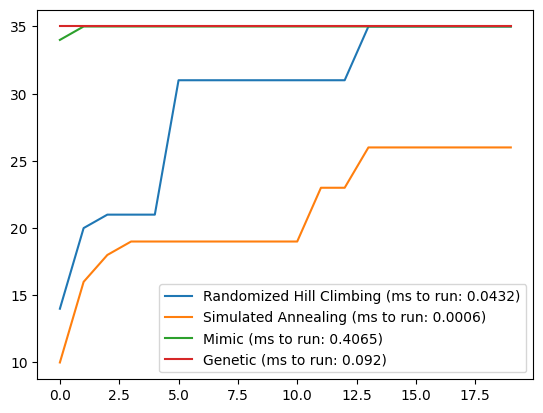

In [20]:
#fitness curves for knapsack
plt.plot(rhc_knapsack_fitness_curve[:20, 0], label = f'Randomized Hill Climbing (ms to run: {round(rhc_knapsack_time, 4)})')
plt.plot(sa_knapsack_fitness_curve[:20, 0], label = f'Simulated Annealing (ms to run: {round(sa_knapsack_time, 4)})')
plt.plot(mimic_knapsack_fitness_curve[:20, 0], label = f'Mimic (ms to run: {round(mimic_knapsack_time, 4)})')
plt.plot(genetic_knapsack_fitness_curve[:20, 0], label = f'Genetic (ms to run: {round(genetic_knapsack_time, 4)})')

plt.legend()
plt.show()

In [7]:
#traveling salesman problem to highlight strengths of simulated annealing
cities = [(0,0), (0,5), (3,6), (5,10), (8,2), (10,10), (2, 3), (7, 7)]
distances = [(0,1,5), (0,4,7), (0,2,9), (1,2,3), (1,3,6), (2,3,5), (2,5,8), (2,4,9), (3,5,5), (4,5,10)]
traveling_sales_fitness_func = mlrose.TravellingSales(cities)
traveling_sales_problen = mlrose.TSPOpt(8, traveling_sales_fitness_func)

In [8]:
#6 peaks to highlight simulated annealing
peaks_fitness_func = mlrose.SixPeaks(.01)
peaks_problem = mlrose.DiscreteOpt(20, peaks_fitness_func)

In [9]:
# Randomized Hill Climb
start = time.time()
rhc_peaks_best_state, rhc_peaks_best_fitness, rhc_peaks_fitness_curve = mlrose.random_hill_climb(
    problem=peaks_problem,
    restarts=100,
    max_attempts=200,
    max_iters=10000,
    init_state=np.array([0 for i in range(20)]),
    curve=True
)
end = time.time()
rhc_peaks_time = end - start
print(f'RHC Time: {rhc_peaks_time}')

# Simulated Annealing
start = time.time()
sa_peaks_best_state, sa_peaks_best_fitness, sa_peaks_fitness_curve = mlrose.simulated_annealing(
    problem=peaks_problem,
    schedule=mlrose.ArithDecay(),
    max_attempts=200,
    max_iters=10000,
    init_state=np.array([0 for i in range(20)]),
    curve=True
)
end = time.time()
sa_peaks_time = end - start
print(f'Simulated Annealing Time: {sa_peaks_time}')

# MIMIC
start = time.time()
mimic_peaks_best_state, mimic_peaks_best_fitness, mimic_peaks_fitness_curve = mlrose.mimic(
    problem=peaks_problem,
    max_attempts=200,
    max_iters=1000,
    curve=True
)
end = time.time()
mimic_peaks_time = end - start
print(f'MIMIC Time: {mimic_peaks_time}')

# Genetic Algorithm
start = time.time()
genetic_peaks_best_state, genetic_peaks_best_fitness, genetic_peaks_fitness_curve = mlrose.genetic_alg(
    problem=peaks_problem,
    max_attempts=200,
    max_iters=1000,
    curve=True
)
end = time.time()
genetic_peaks_time = end - start
print(f'Genetic Algorithm Time: {genetic_peaks_time}')

RHC Time: 0.14139389991760254
Simulated Annealing Time: 0.010740995407104492
MIMIC Time: 11.754392623901367
Genetic Algorithm Time: 0.6402204036712646


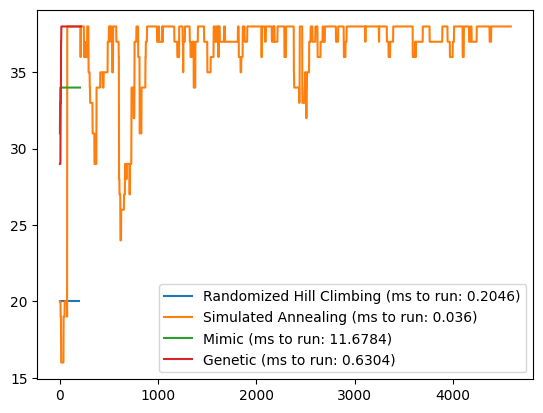

In [17]:
#fitness curves for knapsack
plt.plot(rhc_peaks_fitness_curve[:, 0], label = f'Randomized Hill Climbing (ms to run: {round(rhc_peaks_time, 4)})')
plt.plot(sa_peaks_fitness_curve[:, 0], label = f'Simulated Annealing (ms to run: {round(sa_peaks_time, 4)})')
plt.plot(mimic_peaks_fitness_curve[:, 0], label = f'Mimic (ms to run: {round(mimic_peaks_time, 4)})')
plt.plot(genetic_peaks_fitness_curve[:, 0], label = f'Genetic (ms to run: {round(genetic_peaks_time, 4)})')

plt.legend()
plt.show()

In [32]:
#Max K-Colors
edges = [
    (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9),
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9),
    (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9),
    (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9),
    (4, 5), (4, 6), (4, 7), (4, 8), (4, 9),
    (5, 6), (5, 7), (5, 8), (5, 9),
    (6, 7), (6, 8), (6, 9),
    (7, 8), (7, 9),
    (8, 9)
]

colors_fitness_func = mlrose.MaxKColor(edges)
colors_problem = mlrose.DiscreteOpt(10, colors_fitness_func, max_val=10)

In [5]:
#Max K-Colors
edges = [
    (0, 1), (0, 2)
]

colors_fitness_func = mlrose.MaxKColor(edges)
colors_problem = mlrose.DiscreteOpt(3, colors_fitness_func, max_val=2)
print(colors_fitness_func.evaluate([0, 0, 3]))

1


In [33]:
# Randomized Hill Climb
start = time.time()
rhc_colors_best_state, rhc_colors_best_fitness, rhc_colors_fitness_curve = mlrose.random_hill_climb(
    problem=colors_problem,
    restarts=100,
    max_attempts=200,
    max_iters=10000,
    curve=True
)
end = time.time()
rhc_colors_time = end - start
print(f'RHC Time: {rhc_colors_time}')

# Simulated Annealing
start = time.time()
sa_colors_best_state, sa_colors_best_fitness, sa_colors_fitness_curve = mlrose.simulated_annealing(
    problem=colors_problem,
    schedule=mlrose.ArithDecay(),
    max_attempts=200,
    max_iters=10000,
    curve=True
)
end = time.time()
sa_colors_time = end - start
print(f'Simulated Annealing Time: {sa_colors_time}')

# MIMIC
start = time.time()
mimic_colors_best_state, mimic_colors_best_fitness, mimic_colors_fitness_curve = mlrose.mimic(
    problem=colors_problem,
    max_attempts=200,
    max_iters=1000,
    curve=True
)
end = time.time()
mimic_colors_time = end - start
print(f'MIMIC Time: {mimic_colors_time}')

# Genetic Algorithm
start = time.time()
genetic_colors_best_state, genetic_colors_best_fitness, genetic_colors_fitness_curve = mlrose.genetic_alg(
    problem=colors_problem,
    max_attempts=200,
    max_iters=1000,
    curve=True
)
end = time.time()
genetic_colors_time = end - start
print(f'Genetic Algorithm Time: {genetic_colors_time}')

RHC Time: 0.3717021942138672
Simulated Annealing Time: 0.16313982009887695
MIMIC Time: 3.6102373600006104
Genetic Algorithm Time: 0.8513076305389404


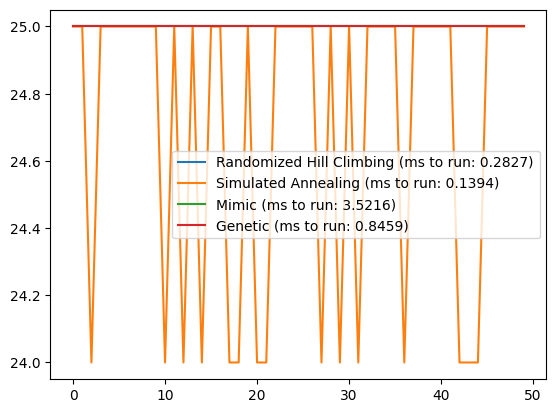

In [31]:
#fitness curves for knapsack
plt.plot(rhc_colors_fitness_curve[:50, 0], label = f'Randomized Hill Climbing (ms to run: {round(rhc_colors_time, 4)})')
plt.plot(sa_colors_fitness_curve[:50, 0], label = f'Simulated Annealing (ms to run: {round(sa_colors_time, 4)})')
plt.plot(mimic_colors_fitness_curve[:50, 0], label = f'Mimic (ms to run: {round(mimic_colors_time, 4)})')
plt.plot(genetic_colors_fitness_curve[:50, 0], label = f'Genetic (ms to run: {round(genetic_colors_time, 4)})')

plt.legend()
plt.show()

In [60]:
#Create custom fitness function to turn N-Queens into a Maximization Problem

queens_fitness_func_helper = mlrose.Queens()
queens_fitness_func = mlrose.CustomFitness(lambda state: 1000 - queens_fitness_func_helper.evaluate(state), 'discrete')
queens_problem = mlrose.DiscreteOpt(50, queens_fitness_func)


In [63]:
# Randomized Hill Climb
start = time.time()
rhc_queens_best_state, rhc_queens_best_fitness, rhc_queens_fitness_curve = mlrose.random_hill_climb(
    problem=queens_problem,
    restarts=100,
    max_attempts=200,
    max_iters=10000,
    curve=True
)
end = time.time()
rhc_queens_time = end - start
print(f'RHC Time: {rhc_queens_time}')

# Simulated Annealing
start = time.time()
sa_queens_best_state, sa_queens_best_fitness, sa_queens_fitness_curve = mlrose.simulated_annealing(
    problem=queens_problem,
    schedule=mlrose.ArithDecay(),
    max_attempts=200,
    max_iters=10000,
    curve=True
)
end = time.time()
sa_queens_time = end - start
print(f'Simulated Annealing Time: {sa_queens_time}')

# MIMIC
start = time.time()
mimic_queens_best_state, mimic_queens_best_fitness, mimic_queens_fitness_curve = mlrose.mimic(
    problem=queens_problem,
    max_attempts=10,
    max_iters=1000,
    curve=True
)
end = time.time()
mimic_queens_time = end - start
print(f'MIMIC Time: {mimic_queens_time}')

# Genetic Algorithm
start = time.time()
genetic_queens_best_state, genetic_queens_best_fitness, genetic_queens_fitness_curve = mlrose.genetic_alg(
    problem=queens_problem,
    max_attempts=10,
    max_iters=1000,
    curve=True
)
end = time.time()
genetic_queens_time = end - start
print(f'Genetic Algorithm Time: {genetic_queens_time}')


RHC Time: 11.453640222549438
Simulated Annealing Time: 4.587653398513794
MIMIC Time: 7.0027008056640625
Genetic Algorithm Time: 3.1029117107391357


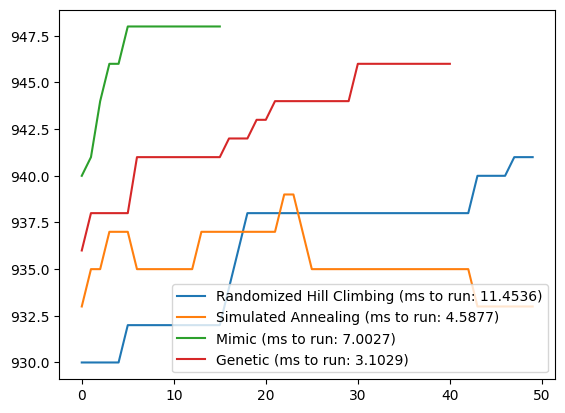

In [64]:
# Fitness curves for Knapsack
plt.plot(rhc_queens_fitness_curve[:50, 0], label = f'Randomized Hill Climbing (ms to run: {round(rhc_queens_time, 4)})')
plt.plot(sa_queens_fitness_curve[:50, 0], label = f'Simulated Annealing (ms to run: {round(sa_queens_time, 4)})')
plt.plot(mimic_queens_fitness_curve[:50, 0], label = f'Mimic (ms to run: {round(mimic_queens_time, 4)})')
plt.plot(genetic_queens_fitness_curve[:50, 0], label = f'Genetic (ms to run: {round(genetic_queens_time, 4)})')

plt.legend()
plt.show()
